<a href="https://colab.research.google.com/github/JayTheCoder77/DataAnalysisLibraries/blob/main/pandas/Session21/21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Series is 1d and data frame 2d


In [2]:
 # multiple indexes series possible?
 index_val = [('cse',2019),('cse',2020),('cse',2021) , ('cse',2022) , ('ece',2019) , ('ece',2020) , ('ece',2021) , ('ece',2022)]
 a = pd.Series([1,2,3,4,5,6,7,8] , index=index_val)
 a[('cse',2022)]

np.int64(4)

In [3]:
# the problem with multiindex series
# a['cse'] error

In [4]:
# solution -> multiindex series also hierarchial indexing
# multiple index levels within a single index

In [5]:
# creating multindex object
# from tuples
index_val = [('cse',2019),('cse',2020),('cse',2021) , ('cse',2022) , ('ece',2019) , ('ece',2020) , ('ece',2021) , ('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex # this is a multiindex object
multiindex.levels[1]
multiindex.levels[0]
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [6]:
# from product
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [7]:
# level inside multiindex object

In [8]:
# series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)


In [9]:
# how to fetch items from such series
s[('cse',2022)]
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [10]:
# logical question to  ask
# why not use a dataframe instead of multindex series

In [11]:
# unstack - multiindex series to dataframe
temp = s.unstack()
temp

2019  2020  2021  2022
cse     1     2     3     4
ece     5     6     7     8

In [12]:
# stack - dataframe to multindex series
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [13]:
# multiindex dataframe
branch_df1 = pd.DataFrame(
    [
            [1,2],
            [3,4],
            [5,6],
            [7,8],
            [9,10],
            [11,12],
            [13,14],
            [15,16]
    ],
    index = multiindex,
    columns = ['avg_package', 'students']
)
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [14]:
branch_df1.loc['cse']
branch_df1.loc['ece']
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [15]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [16]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [17]:
branch_df2['mumbai']['avg_package']
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [18]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [19]:
branch_df3.loc['cse']

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [20]:
# stacking and unstacking

In [21]:
branch_df1.unstack().unstack() # columns multiindexing occurs
# after second unstack branch df1 is converted to series
# unstack - row to col

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [22]:
branch_df1.unstack().stack().stack()  # stack - column to row ||  doesnt work on series
# after 2 stacks again converted to series

<ipython-input-22-f183961ede03>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()  # stack - column to row ||  doesnt work on series


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [23]:
branch_df2.unstack()
branch_df2.stack()
branch_df2.stack().stack() # converted to series (3d series)

<ipython-input-23-f0cff9a329a3>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()
<ipython-input-23-f0cff9a329a3>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack() # converted to series (3d series)


2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [24]:
branch_df3.unstack()
branch_df3.unstack().unstack() # 4d series

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
dtype: int64

In [25]:
branch_df3.stack()
branch_df3.stack().stack() # 4d series

<ipython-input-25-b3b473fd7b67>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack()
<ipython-input-25-b3b473fd7b67>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack() # 4d series


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
                        mumbai     0
     2022  avg_package  delhi     15
                        mumbai     0
           students     delhi     16
                        mumbai     0
dtype: int64

In [26]:
# working with multiindex dataframes

In [27]:
# head and tail
branch_df3.head()
branch_df3.tail()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [28]:
# extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [29]:
# multiple rows
branch_df3.loc[('cse',2019): ('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [30]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [31]:
# column
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [32]:
# mutiple cols
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [33]:
# extracting both
branch_df3.iloc[[0,4],[1,2]]

delhi      mumbai
         students avg_package
cse 2019        2           0
ece 2019       10           0

In [34]:
# sort index
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[True,False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [35]:
# sort on only one level
branch_df3.sort_index(level=1,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [36]:
# multitindex datafrme col transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [37]:
# swap level
branch_df3.swaplevel()
branch_df3.swaplevel(axis=1) # column swap level

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [38]:
# wide vs long data

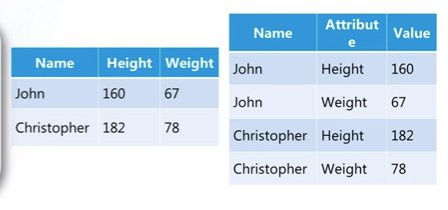


Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.

Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [39]:
# melt = wide to long
# pivot = long to wide

In [40]:
# melt
pd.DataFrame({'cse' : [120]})
pd.DataFrame({'cse' : [120]}).melt()

variable  value
0      cse    120

In [41]:
pd.DataFrame({'cse' : [120] , 'ece' : [100] , 'mech' : [50]}).melt(var_name='branch',value_name='num students')

branch  num students
0    cse           120
1    ece           100
2   mech            50

In [42]:
pd.DataFrame({
    'branch' : ['cse','ece','mech'],
    '2020' : [100,150,60],
    '2021' : [120,130,80],
    '2022' : [150,140,70]
}).melt(id_vars=['branch'],var_name='year',value_name='num students') # issue as branch branch branch
# we will skip branch

branch  year  num students
0    cse  2020           100
1    ece  2020           150
2   mech  2020            60
3    cse  2021           120
4    ece  2021           130
5   mech  2021            80
6    cse  2022           150
7    ece  2022           140
8   mech  2022            70

In [43]:
# melt -> real world example
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [44]:
death.head()
death.shape # 1081 cols wide data

(289, 1081)

In [45]:
confirm.head()
confirm.shape # 1081 cols wide data

(289, 1081)

In [46]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths1')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases1')

In [47]:
death.head()

Province/State Country/Region       Lat       Long     date  num_deaths1
0            NaN    Afghanistan  33.93911  67.709953  1/22/20            0
1            NaN        Albania  41.15330  20.168300  1/22/20            0
2            NaN        Algeria  28.03390   1.659600  1/22/20            0
3            NaN        Andorra  42.50630   1.521800  1/22/20            0
4            NaN         Angola -11.20270  17.873900  1/22/20            0

In [48]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases1','num_deaths1']]

Country/Region     date  num_cases1  num_deaths1
0                Afghanistan  1/22/20           0            0
1                    Albania  1/22/20           0            0
2                    Algeria  1/22/20           0            0
3                    Andorra  1/22/20           0            0
4                     Angola  1/22/20           0            0
...                      ...      ...         ...          ...
311248    West Bank and Gaza   1/2/23      703228         5708
311249  Winter Olympics 2022   1/2/23         535            0
311250                 Yemen   1/2/23       11945         2159
311251                Zambia   1/2/23      334661         4024
311252              Zimbabwe   1/2/23      259981         5637

[311253 rows x 4 columns]